## Sentimental Analysis in Python
### Techniques
#### 1.VADER (Valence Aware Dictionary and sEntiment Reasoner)-Bag of words approach
#### 2.Roberta Pretrained Model form Hugging Face
#### 3.Huggingface Pipline


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# lodd data
df = pd.read_csv("./datasets/Reviews.csv")

In [3]:
df.head()
df = df.head(1000)

In [4]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
print(df.shape)

(1000, 10)


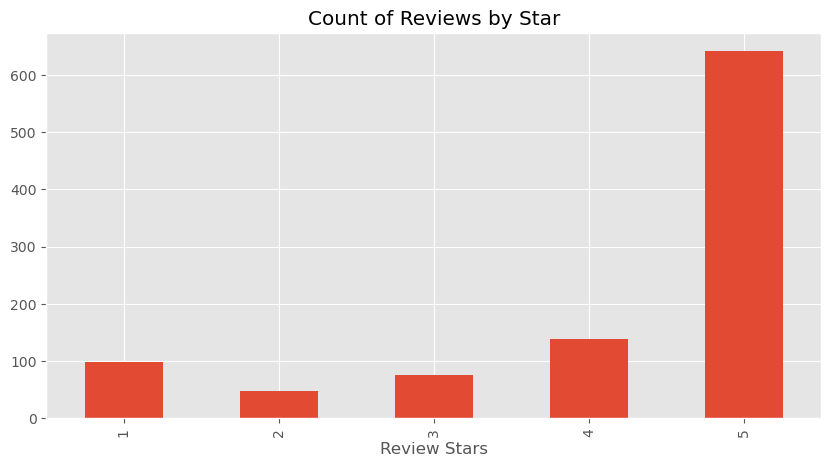

In [6]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Star' ,figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [7]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [8]:
token = nltk.word_tokenize(example)
token[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [9]:
tagged=nltk.pos_tag(token)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [10]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER sentiment Scoring

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()
sia

In [12]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [13]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [14]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [15]:
#Run the polarity scores on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total= len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid]= sia.polarity_scores(text)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
vaders = pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [17]:
# Now we have sentiment store and metadata
vaders.head()


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
#Plot vaders results

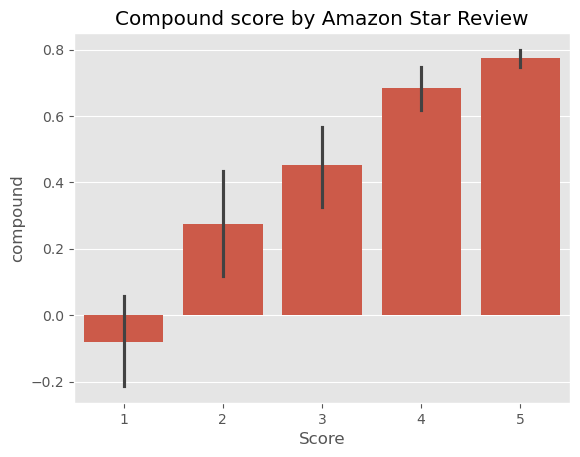

In [19]:
sns.barplot(data= vaders,x='Score',y='compound')
plt.title("Compound score by Amazon Star Review")
plt.show()

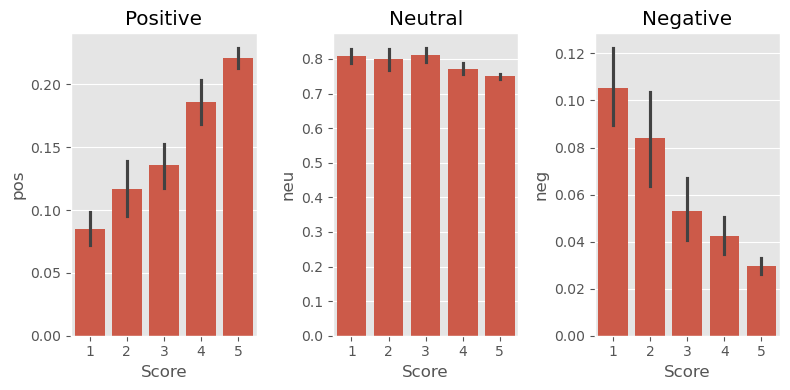

In [20]:
fig,axs= plt.subplots(1,3, figsize=(8,4))
sns.barplot(data= vaders,x='Score',y='pos', ax=axs[0])
sns.barplot(data= vaders,x='Score',y='neu', ax=axs[1])
sns.barplot(data= vaders,x='Score',y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model
##### Use a model trained of a large corpus of data
##### Transformer model accounts for the words but also the context related to other words.

In [21]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
#pip install hf_xet

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
# VADER resultls on example
print(example)
sia.polarity_scores(example)


This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [25]:
# Run for Roberta Model
encoded_text=tokenizer(example, return_tensors ="pt")
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print (scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


In [26]:
 def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors ="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict={
        'robert_neg':scores[0],
        'robert_neu':scores[1],
        'robert_pos':scores[2],
    }
    return scores_dict
 

In [31]:
#Run the polarity scores on the entire dataset
res={}
for i,row in tqdm(df.iterrows(),total= len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result= sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        roberta_result = polarity_scores_roberta(text)
        both={**vader_result_rename,**roberta_result}
        res[myid]=both
    except RuntimeError: 
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'Id'})
results_df = results_df.merge(df,how='left')


In [33]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,robert_neg,robert_neu,robert_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Compare Scores between models

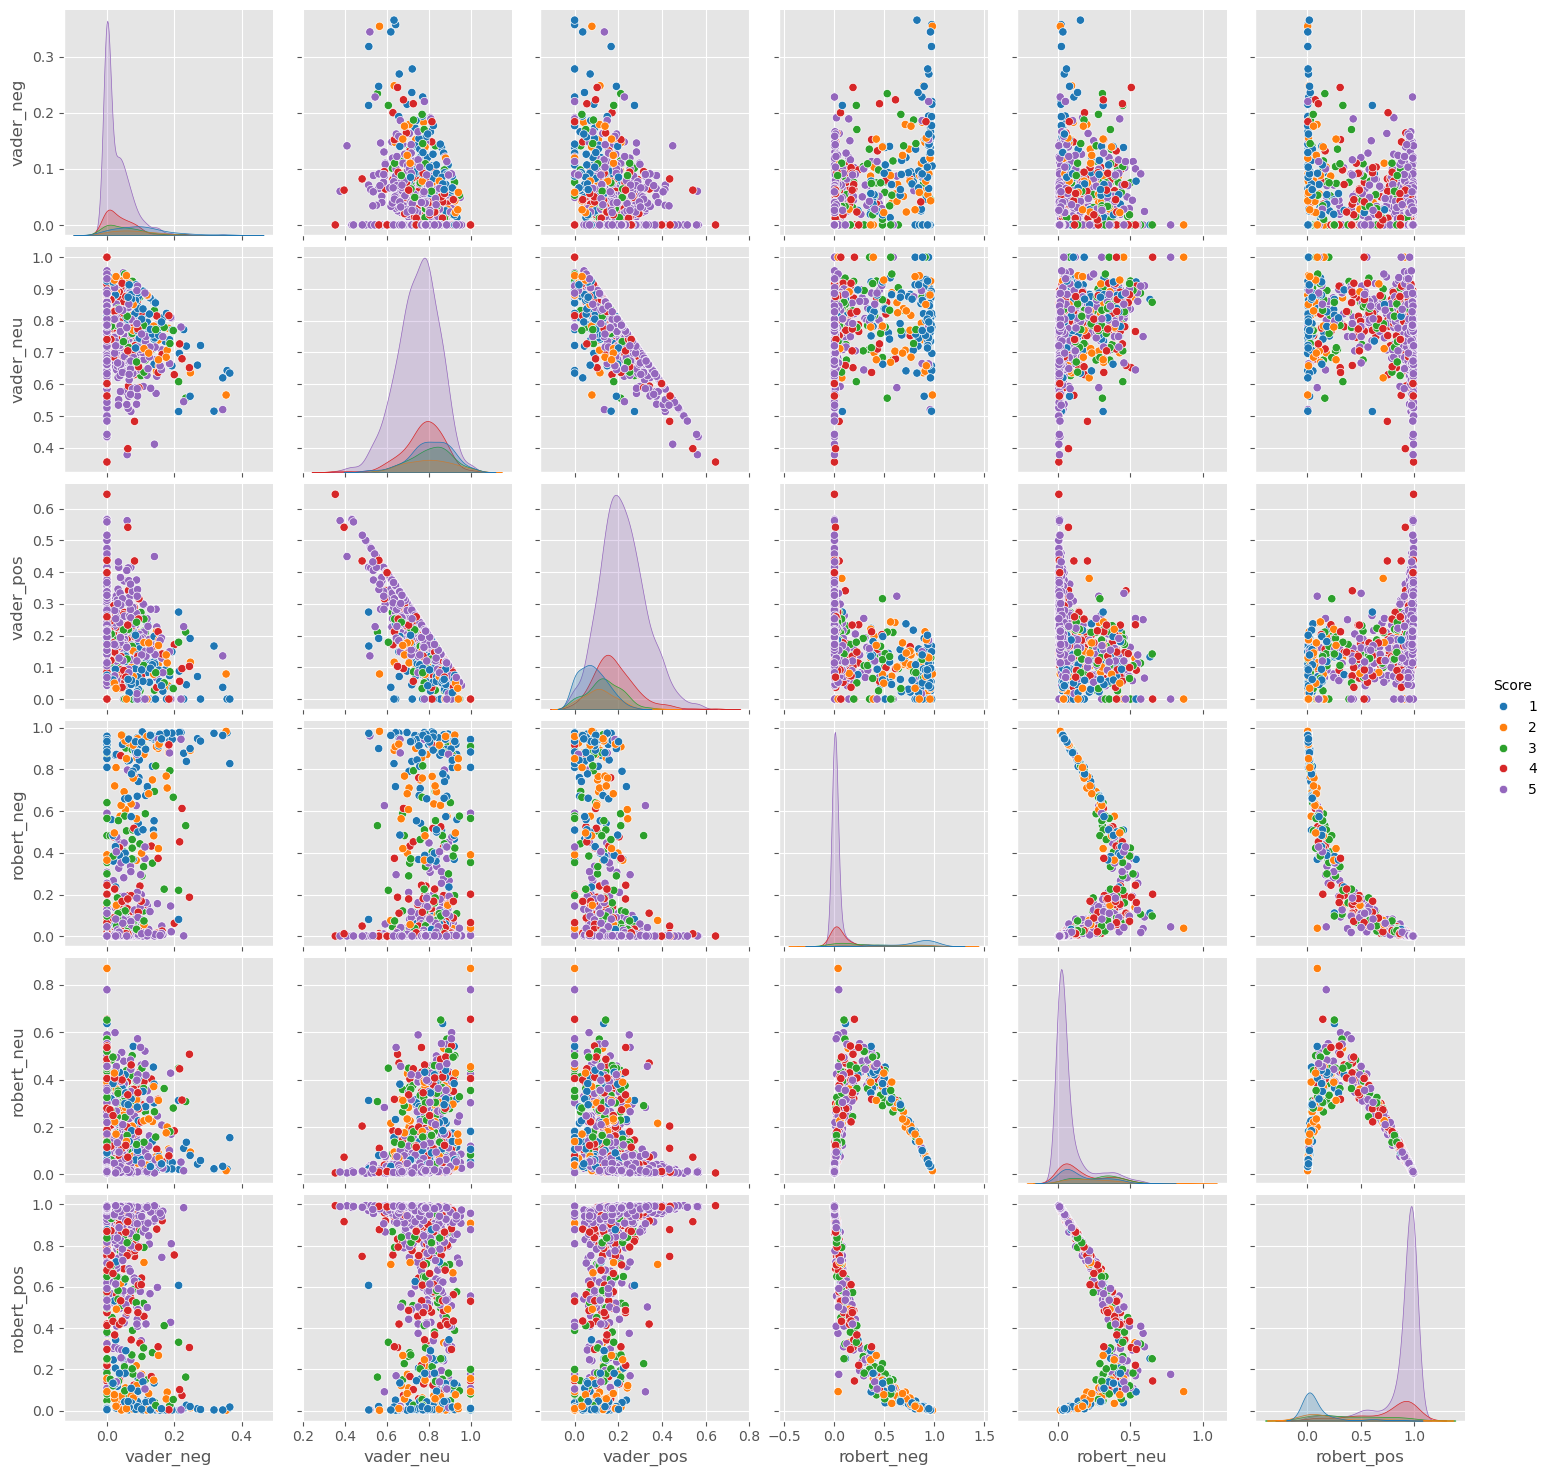

In [35]:
sns.pairplot(data=results_df,vars=['vader_neg','vader_neu','vader_pos','robert_neg','robert_neu','robert_pos'], hue='Score',palette='tab10')
plt.show()

In [36]:
results_df.query('Score==1')\
    .sort_values('robert_pos',ascending =False)['Text'].values[1]

'If it were possible to give this product zero stars, I would have done so.  I am a huge fan of Twinings teas, and was very excited to try this new blend.  After arriving home from the grocery, I immediately started the kettle to enjoy a cup while prepping dinner.  Between sorting, washing, and chopping items, the hot water was added to the bag to steep.  Preparation continued, until a distinctly off odor hit me.  I thought one of my ingredients must be rancid!  I hunted around for almost four minutes before I realized it was the tea.  Even after cleaning up, and airing out the kitchen, my roommate later came in and asked about the smell.  Save your money to purchase ANY other Twinings product.'

In [37]:
results_df.query('Score==1')\
    .sort_values('vader_pos',ascending =False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [38]:
#negtative setimenta five star review

In [39]:
results_df.query('Score==5')\
    .sort_values('vader_neg',ascending =False)['Text'].values[0:3]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       'I love using this to sweeten tea, coffee, etc. It tastes much better than other low glycemic sweeteners - there is no bitter aftertaste.',
       "If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth."],
      dtype=object)

In [40]:
results_df.query('Score==5')\
    .sort_values('robert_neg',ascending =False)['Text'].values[0:3]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       "If this flavor lasted longer than it does, I'd probably die of starvation for lack of wanting to take it out of my mouth.",
       "this gum is super sick.tatooes are killin.flavor is a spankin'.this brings back bomb diggity memories yo.peace out."],
      dtype=object)

In [ ]:
## The transoformers Pipeline
cx 

In [41]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis", framework="pt")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [42]:
sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [44]:
sent_pipeline('boo thats not what i want')

[{'label': 'NEGATIVE', 'score': 0.9997580647468567}]